In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pandas as pd
from scipy.special import kl_div
from scipy.stats import entropy
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
#import umap
#from umap.umap_ import UMAP
from mpl_toolkits import mplot3d
import plotly.express as px
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize

# Process Methods

In [ ]:
# readInCSV(Path)
# Author: Joanna Godawa
#
# firstly checks if file name is valid. Next,
# returns file at path as DataFrame object.
#
def readInCSV(path):
    if path[-4] != ".csv":
        path = path + ".csv"
    file = pd.read_csv(path)
    df = pd.DataFrame(file)
    return df

# writeOutCSV(Path)
# Author: Joanna Godawa
#
# firstly checks if file name is valid. Next,
# writes data frame out to the provided path
# as a CSV.
#
def writeOutCSV(df, path):
    if path[-4] != ".csv":
        path = path + ".csv"
    df.to_csv(path, index = False)

import re


# calcRepetition(lyrics)
# Author: Joanna Godawa
#
# Takes in a string list of lyrics and
# converts them to a dictionary, where their
# repetition score is determined by the total
# number of non-unique words divided by the
# total number of words in the song.
#
def calcRepetition(lyrics):
    lyrDict = {}
    repetition = 0

    for lyric in lyrics:
        if lyric not in lyrDict:
            lyrDict[lyric] = 1
        else:
            lyrDict[lyric] += 1

    for key in lyrDict:
        repetition += lyrDict[key] - 1
    repetition = repetition / len(lyrics)
    return repetition

# cleanLine(line)
# Author: Joanna Godawa
#
# Converts line to lowercase letter and strips
# punctuation. Not necessary for the music data
# set, but necessary if using outside files for
# testing purposes.
#
def cleanLine(line):
    line = line.strip('\n')
    line = re.sub(r'[^\w\s]', '', line)
    line = line.lower()
    return line


# readFileIn(file)
# Author: Joanna Godawa
#
# Function to convert a txt file into a cleaned
# string list for repetition calculation. Used
# for testing purposes.
#
def readFileIn(file):
    lyrics = ""
    for line in file:
        line = cleanLine(line)
        lyrics = lyrics + line + " "
    lyrics = lyrics.split(" ")
    return lyrics

# readCellIn(cell)
# Author: Joanna Godawa
#
# Converts a specified cell into a cleaned string
# list for repetition score calculation
#
def readCellIn(cell):
    cell = cleanLine(cell)
    lyrics = cell.split(" ")
    return lyrics

# calcRepetitionForAll(df)
# Author: Joanna Godawa
#
# Given a DataFrame, append a lyrical repetition
# score to all rows. Returns the modified DataFrame.
#
def calcRepetitionForAll(df):
    df['lyrical repetition'] = 0.0
    for index, row in df.iterrows():
        lyrics = row['lyrics']
        repetitionScore = calcRepetition(readCellIn(lyrics))
        df.iat[index, 31] = repetitionScore
    return df

# calcFamilyFriendlyForAll(df)
# Author: Joanna Godawa
#
# Given a DataFrame, append a family friendliness
# (0 or 1) value to all rows. Returns the modified
# DataFrame.
#
def calcFamilyFriendlyForAll(df):
    df['family friendly'] = 0
    for index, row in df.iterrows():
        score = calcFamilyFriendly(row['topic'])
        df.iat[index, 32] = score
    return df

# calcFamilyFriendly(topic)
# Author: Joanna Godawa
#
# Given a song's topic, determine if it is family
# friendly. Returns a 0 if not, and a 1 if is.
#
def calcFamilyFriendly(topic):
    if topic == "violence" or topic == "obscene":
        return 0
    return 1

# calcExtraCells(df, path)
# Author: Joanna Godawa
#
# runs family friendly and repetition score functions
# on a given DataFrame. Writes the new CSV file out
# to the specified path.
#
def calcExtraCells(df, path):
    df = calcRepetitionForAll(df)
    df = calcFamilyFriendlyForAll(df)
    writeOutCSV(df, path)

def extract_songs_by_feature(data,feature,target):
  songs_feature = data[data[feature] == target]
  return songs_feature

# Figure Generation Methods

In [ ]:
genres = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']

# generateYearPlots(df)
# Author: Joanna Godawa
#
# Given a DataFrame, generate line plots describing
# genre relevance over time for all genres.
#

def generateYearPlots(df):
    for genre in genres:
        genreFrame = df[df['genre'] == genre]
        genreFrame = genreFrame.groupby('release_date').sum()
        genreFrame = pd.DataFrame(genreFrame)
        sns.lineplot(data = genreFrame, x = 'release_date', y = 'count')
        fileName = genre + "_year_plot.png"
        plt.savefig(fileName)
        plt.clf()

# cluster_and_plot_multi(data, num_clusters)
# Author: Joanna Godawa
#
# Given a DataFrame, generate a seaborn pairplot cluster
# graphic displaying all dimensionalities of the kmeans
# result.
#
def cluster_and_plot_multi(data,num_clusters):
    km = KMeans(n_clusters=num_clusters)
    km.fit(data)
    label = km.labels_
    data['label'] = label
    sns.pairplot(data, hue = 'label')
    plt.legend()
    plt.show()



In [ ]:
# splitting and clustering methods

#
# split_by_features(data,features)
# Author: Hailey Sparks
#
# split the data by a specifc feature
#

def split_by_features(data,features):
    split_columns = data[features]
    return split_columns

#
# cluster_and_plot(data,num_clusters):
# Author: Hailey Sparks
#
# used k means for a specified bumber of clusters
# and plot clusters
#

def cluster_and_plot(data,num_clusters):
    km = KMeans(n_clusters=num_clusters)
    km.fit(data)
    label = km.fit_predict(data)
    u_labels = np.unique(label)
    for i in u_labels:
        plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
    plt.legend()
    plt.show()

#
# determine_optimal_clusters(data,start,end)
# Author: Hailey Sparks
#
# use elbow method to determine optimal clusters
#

def determine_optimal_clusters(data,start,end):
    ks = [i for i in range(start,end)]

    inertias = []
    for i in ks:
        km = KMeans(n_clusters=i)
        km.fit(df)
        km.fit_predict(df)
        inertias.append(km.inertia_)
    plt.plot(ks, inertias)


In [ ]:
#
# fit_and_predict(data, startcol, endcol, feature, num_neighbors)
# Author: Hailey Sparks
#
# fir knn model to a data set based on specific feature and number of nieghbors
# return root of sse
#


def fit_and_predict(data, startcol, endcol, feature, num_neighbors):
    knn_model = KNeighborsRegressor(n_neighbors=num_neighbors)
    X_train = data[data.columns[startcol:endcol]]
    y_train = df.loc[:,feature]
    le = preprocessing.LabelEncoder()
    y_train = le.fit_transform(y_train)
    knn_model.fit(X_train, y_train)
    train_preds = knn_model.predict(X_train)
    mse = mean_squared_error(y_train, train_preds)
    rmse = sqrt(mse)
    data['preds'] = le.inverse_transform(train_preds.astype(int))
    return rmse

#
# print_predictions(data,feature)
# Author: Hailey Sparks
#
# print predictions and check if predictions arwe correct
#

def print_predictions(data,feature):
    count = 0
    for idx, row in data.iterrows():
        if row[feature] != row['preds']:
            print('Wrong',row[feature], row['preds'])
        else:
            print('Correct:', row[feature])
            count += 1
        if count > 30:
          break

#
# plot_error(data,start_col,end_col,min_neighbor,max_neighbor,feature)
# Author: Hailey Sparks
#
# plot mse for all number of nieghbors
#

def plot_error(data,start_col,end_col,min_neighbor,max_neighbor,feature):
  all_mse = []
  for i in range(min_neighbor,max_neighbor):
    error = fit_and_predict(data,start_col,end_col,feature,i)
    all_mse.append(error)
    #print("Number of neighbors: ",i,error)
  n_num = []
  for i in range(min_neighbor,max_neighbor):
    n_num.append(i)
  plt.plot(n_num,all_mse)
  plt.xlabel("Number of Neighbors")
  plt.ylabel("Mean Squared Error")
  plt.show()

# Preprocess


In [ ]:
data = pd.read_csv('tcc_ceds_music.csv')
data = data.reset_index()


In [ ]:
data.head()

,index,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [ ]:
data.tail()

,index,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
28367,28367,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,28368,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,28369,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,28370,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286
28371,28371,82451,jeezy,r.i.p.,2019,hip hop,remix killer alive remix thriller trap bitch s...,83,0.001012,0.075202,...,0.001012,0.033995,0.828875,0.674794,0.015862,0.000000,0.475474,0.492477,obscene,0.014286


In [ ]:
data.columns

Index(['index', 'Unnamed: 0', 'artist_name', 'track_name', 'release_date',
       'genre', 'lyrics', 'len', 'dating', 'violence', 'world/life',
       'night/time', 'shake the audience', 'family/gospel', 'romantic',
       'communication', 'obscene', 'music', 'movement/places',
       'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness',
       'feelings', 'danceability', 'loudness', 'acousticness',
       'instrumentalness', 'valence', 'energy', 'topic', 'age'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     28372 non-null  int64  
 1   Unnamed: 0                28372 non-null  int64  
 2   artist_name               28372 non-null  object 
 3   track_name                28372 non-null  object 
 4   release_date              28372 non-null  int64  
 5   genre                     28372 non-null  object 
 6   lyrics                    28372 non-null  object 
 7   len                       28372 non-null  int64  
 8   dating                    28372 non-null  float64
 9   violence                  28372 non-null  float64
 10  world/life                28372 non-null  float64
 11  night/time                28372 non-null  float64
 12  shake the audience        28372 non-null  float64
 13  family/gospel             28372 non-null  float64
 14  romant

In [ ]:
data['topic'].unique()

array(['sadness', 'world/life', 'music', 'romantic', 'violence',
       'obscene', 'night/time', 'feelings'], dtype=object)

In [ ]:
data['genre'].unique()

array(['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop'],
      dtype=object)

In [ ]:
cluster_columns = ['dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']


In [ ]:
df = split_by_features(data,cluster_columns)
df = df.fillna(0)

In [ ]:
df.head()

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy
0,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,...,0.000598,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110
1,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,...,0.051124,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240
2,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,...,0.002770,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112
3,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,...,0.001548,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736
4,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,...,0.029755,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375


In [ ]:
data.head()
data = data.fillna(0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


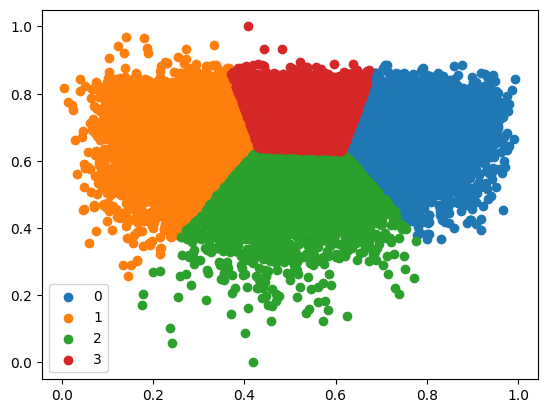

In [ ]:
visual_columns = ['danceability','loudness']
df = split_by_features(data,visual_columns)
cluster_and_plot(df,num_clusters=4)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

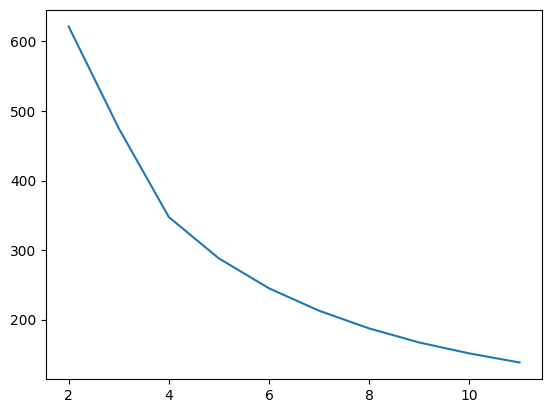

In [ ]:
# finding optimal clusters
determine_optimal_clusters(df, 2,12)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from math import sqrt

In [ ]:
data.head()

,index,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


<ipython-input-19-33c16cbcefb4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['preds'] = le.inverse_transform(train_preds.astype(int))
<ipython-input-19-33c16cbcefb4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['preds'] = le.inverse_transform(train_preds.astype(int))
<ipython-input-19-33c16cbcefb4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

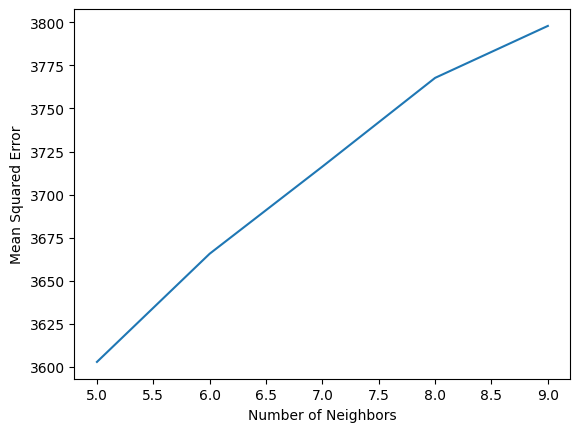

In [ ]:
df = split_by_features(data,cluster_columns)
plot_error(df,0,len(df.columns),5,10,'sadness')

In [ ]:
data['genre'].unique()

array(['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop'],
      dtype=object)

In [ ]:
#for c in data.columns[6:29]:
#    data.boxplot(c,by='genre',figsize=(7,4),fontsize=14)
#    plt.title("{}\n".format(c),fontsize=16)
#    plt.xlabel("Genre", fontsize=16)

In [ ]:
#for c in data.columns[6:29]:
  #  data.boxplot(c,by='topic',figsize=(7,4),fontsize=14)
  #  plt.xticks(rotation =45)
  #  plt.title("{}\n".format(c),fontsize=16)
  #  plt.xlabel("Topic", fontsize=16)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df.head()

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,preds
0,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,...,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,0.408890
1,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,...,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,0.001949
2,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,...,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,0.002105
3,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,...,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,0.213998
4,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,...,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,0.021240


In [ ]:
X = scaler.fit_transform(df)

In [ ]:
dfx = pd.DataFrame(data=X,columns=df.columns)

In [ ]:
def scale(df):
  X = scaler.fit_transform(data)
  dfx = pd.DataFrame(data=X,columns=df.columns)
  return dfx

In [ ]:
dfx.head(10)

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,preds
0,-0.391712,-0.305855,-0.699056,-0.507401,-0.413684,0.758051,-0.297631,1.707845,-0.532651,-0.168319,...,-0.469610,1.385172,1.202773,-1.013825,-1.947119,2.016345,3.890204,-0.770682,-1.770864,1.680758
1,0.275459,-0.120996,1.872639,-0.501275,-0.396826,0.237390,-0.446751,-0.688320,-0.528870,0.470192,...,-0.457884,-0.707220,-0.414688,-1.163891,-0.163321,1.884201,-0.378938,-0.828168,-1.254742,-0.615461
2,-0.350237,-0.647112,-0.686443,-0.487995,-0.360278,-0.340172,1.035725,1.588406,-0.520671,2.138607,...,-0.432464,-0.699015,2.713537,-0.444823,-0.737428,1.533864,-0.378945,-0.721409,-1.762671,-0.614581
3,0.518198,-0.653951,-0.693540,-0.498914,0.100271,-0.369294,3.420147,-0.685907,-0.527412,-0.474339,...,0.907699,0.532739,-0.410999,0.887015,0.729996,-0.781430,0.564963,0.966207,0.711434,0.581055
4,-0.377363,-0.655062,1.723607,-0.500687,-0.395207,-0.374023,3.909285,-0.687719,-0.528507,-0.475948,...,-0.456758,-0.334489,-0.413769,-1.395243,-0.173016,1.948737,-0.377781,0.255848,-0.718140,-0.506611
5,-0.383032,1.691779,-0.696416,0.149134,-0.402507,-0.381098,-0.448929,-0.690430,-0.530144,-0.478355,...,-0.461836,-0.006059,-0.417913,0.899520,0.187574,1.712106,-0.378945,0.937464,-0.083229,-0.237539
6,-0.393912,-0.659912,1.456728,-0.148989,-0.416517,-0.394676,-0.454299,2.812063,-0.533287,-0.482976,...,-0.471580,-0.711641,1.286156,-0.951297,-0.291005,0.295394,-0.378945,-0.996519,-0.341289,-0.619710
7,-0.355274,-0.648588,1.249057,-0.490352,-0.366765,-0.346459,1.208180,-0.677159,-0.522126,-0.466569,...,-0.436975,-0.368706,-0.397625,-0.888769,-1.252658,1.795080,-0.378604,-0.635180,-1.545573,-0.347880
8,1.192033,-0.651285,-0.690774,1.705537,-0.378616,-0.357944,3.328391,0.831720,-0.524785,-0.470477,...,-0.445218,-0.703132,0.008422,-0.213471,0.008580,1.945663,-0.378877,0.354395,-0.693563,-0.617460
9,-0.381749,-0.088698,-0.696026,-0.030765,-0.400855,-0.379497,-0.448295,0.135957,-0.529774,-0.477811,...,-0.460687,2.766474,-0.416975,0.743201,-0.203991,1.973322,-0.378116,0.843024,-0.640312,2.724955


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)

In [ ]:
#
# principal_components(dfx_pca)
# Author: Hailey Sparks
#
# plot explained variance ratio for principal components
#

def principal_components(dfx_pca):
  plt.figure(figsize=(10,6))
  plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
  plt.grid(True)
  plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
  plt.xlabel("Principal components",fontsize=15)
  plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
  plt.yticks(fontsize=15)
  plt.ylabel("Explained variance ratio",fontsize=15)
  plt.show()

#
# transform(dfx)
# Author: Hailey Sparks
#
# return transform of data frame matrix
#

def transform(dfx):
  dfx_trans = pca.transform(dfx)
  dfx_trans = pd.DataFrame(data=dfx_trans)
  return dfx_trans

#
# plot_components(data, trans,comp_1,comp_2,feature)
# Author: Hailey Sparks
#
# plot feature seperation for two principal components
#

def plot_components(data, trans,comp_1,comp_2,feature):
  colors = []
  #print(len(data.loc[:,feature].unique()))
  for i in range(0,len(data.loc[:,feature])):
    colors.append(i)

  plt.figure(figsize=(10,6))
  plt.scatter(dfx_trans[comp_1],dfx_trans[comp_2],c = colors,edgecolors='k',alpha=0.75,s=150)
  plt.grid(True)
  plt.title("Genre separation using first two principal components\n",fontsize=20)
  plt.xlabel("Principal component-1",fontsize=15)
  plt.ylabel("Principal component-2",fontsize=15)
  plt.show()

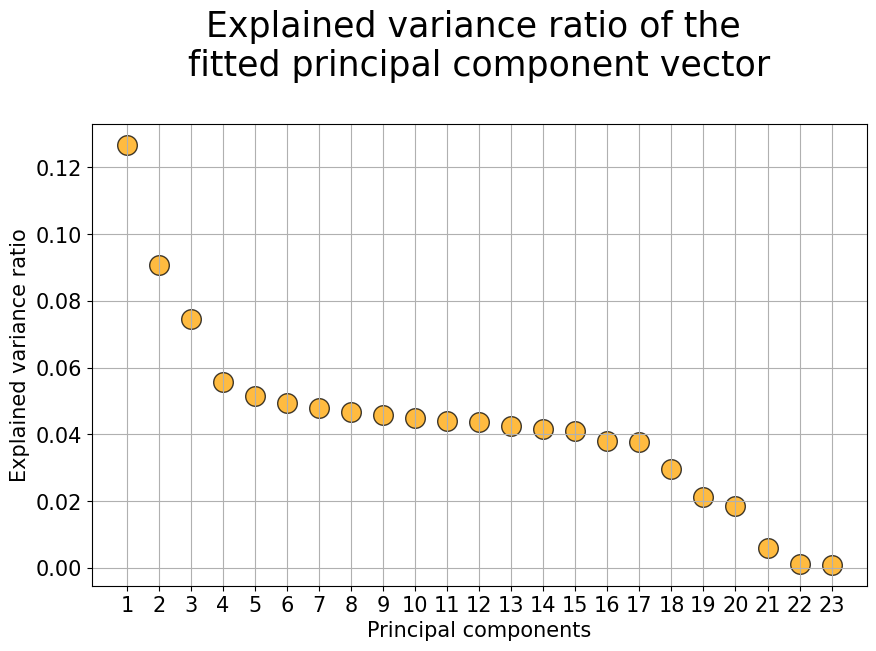

In [ ]:
principal_components(dfx_pca)

In [ ]:
dfx_trans = transform(dfx)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,4.014175,0.533174,0.255687,-0.174992,1.059466,2.926859,0.465864,1.439179,0.752001,-1.405128,...,1.283183,0.917319,1.352957,0.664692,0.672704,0.550628,-0.421151,-0.082673,-0.115488,0.191633
1,2.038114,-1.835260,1.517224,-0.144795,-1.159027,-1.569249,0.106281,-0.059442,-0.377289,0.243833,...,0.626691,0.297641,-0.909319,-0.581042,0.302406,0.804897,-0.922033,-0.272477,-0.107362,-0.002424
2,2.366234,-1.810745,-0.618185,1.476050,0.613118,1.333946,0.548057,-0.918826,-0.508390,1.381785,...,-0.183612,-0.494288,-0.306334,0.547151,-0.337558,-0.200760,-0.342455,-0.371928,-0.108549,-0.002065
3,-0.504726,1.010160,-1.307574,0.513924,0.876934,-0.667329,-0.837230,0.342040,-0.864872,0.147247,...,-0.902182,0.518901,2.166735,1.322141,0.151823,-0.786620,-0.002273,-0.074881,-0.016671,0.021109
4,2.223979,-1.426950,0.306046,1.707095,-1.124738,-0.796212,-0.561452,0.211155,-0.529886,0.717253,...,-0.794236,0.067489,1.221271,1.763708,-0.939478,1.323136,-0.428208,-0.033977,-0.028579,-0.137445
5,0.153900,-0.321549,0.231461,-1.030309,0.549596,0.068459,0.413854,-0.925647,-0.980301,-1.124579,...,0.204198,-0.552270,-0.342407,-1.570972,-0.723802,1.009952,-1.386970,0.321326,0.367882,0.068877
6,0.789198,-0.635404,0.918557,2.405047,-1.808776,1.389322,0.067467,-0.896606,0.433748,0.077093,...,0.510127,0.067484,-0.450613,-0.210500,0.854240,0.032478,0.116296,0.094110,-0.038780,0.022747
7,3.062045,-1.764418,1.136897,-0.012580,-0.758018,-1.716332,-1.196963,-0.830597,-1.538380,-1.141758,...,1.025539,-0.474344,-0.486816,-0.371833,0.835266,0.507935,-0.129560,0.019799,-0.027619,-0.029727
8,1.514833,-1.274823,-1.224554,2.624267,1.346623,0.403878,0.044424,-1.231244,-0.041987,0.134066,...,-0.894762,0.188057,0.392033,1.056140,-0.047599,0.561936,-0.925838,0.045088,-0.055001,0.013347
9,2.347551,2.995507,-1.577085,-1.376489,-0.198310,0.630074,0.074174,-0.529523,0.545682,-0.541441,...,-0.524648,-0.160413,0.324641,-0.721141,-0.430231,0.904237,-1.177104,0.239521,-0.087524,-0.076126


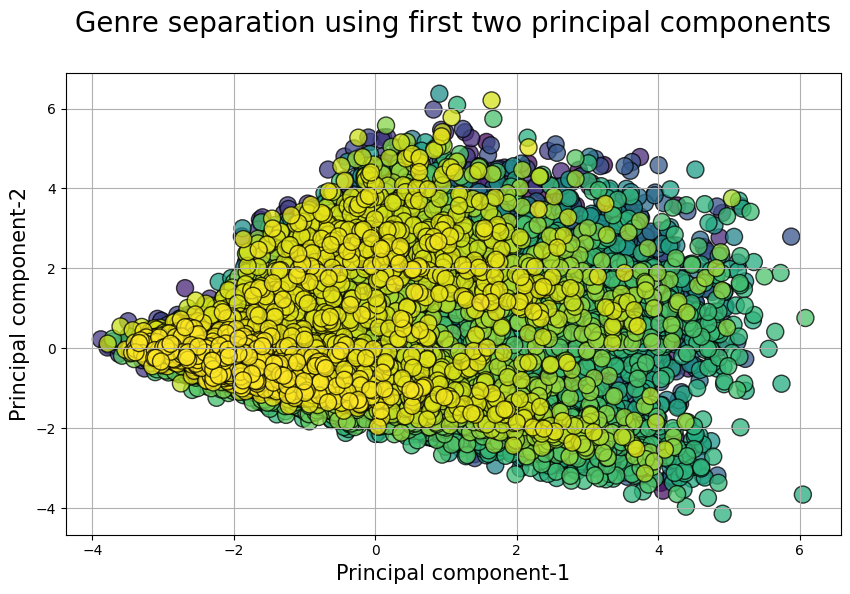

In [ ]:
plot_components(data, dfx_trans,0,1,'genre')

# Lyrical Repetition Code

In [ ]:
import lyricalRepetition as rep
for i, row in data.head().iterrows():
  lyrics = row['lyrics']
  lyrics = lyrics.split(" ")
  score = rep.calcRepetiton(lyrics)
  print(score)

ModuleNotFoundError: ignored

In [ ]:
def lyric_wordcount(song_string):
    from collections import defaultdict
    d = defaultdict(int)
    lyrics = song_string.split(" ")
    for lyric in lyrics:
        d[lyric] += 1
    return d

# NLP

In [ ]:
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.tokenize import word_tokenize
import sklearn
import gensim
import gensim.similarities
from gensim.models.word2vec import Word2Vec
from scipy import spatial
import numpy as np
import pandas as pd
from pprint import pprint
import spacy
import pickle
import re
from numpy.linalg import norm
from IPython.display import *
from IPython.display import HTML
from scipy import sparse
from scipy.sparse import csr_matrix

#
# read_corpus(text, tokens_only=False)
# Author: Hailey Sparks
#
# read in text for doc2vec model
#

def read_corpus(text, tokens_only=False):
    count=0
    for doc in text:
        count+=1
        tokens = gensim.utils.simple_preprocess(doc)
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [count])

#
# build_doc2vec(untokenized_text)
# Author: Hailey Sparks
#
# build a doc2vec model on the corpus
#

def build_doc2vec(untokenized_text):
    train_corpus = list(read_corpus(untokenized_text))
    test_corpus = list(read_corpus(untokenized_text, tokens_only=True))
    model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=20)
    model.build_vocab(train_corpus)
    model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
    return model

#
# compute_vectors(text,model)
# Author: Hailey Sparks
#
# compute vectors for text
#

def compute_vectors(text,model):
    vectors = list()
    for sentence in text:
        vectors.append(model.infer_vector(sentence))
    return vectors

#
# tokenize(text)
# Author: Hailey Sparks
#
# tokenize text
#

def tokenize(text):
    tokenized = list()
    for i in range(0, len(text)):
        tokenized.append(word_tokenize(text[i]))
    return tokenized

#
# extract_songs_by_feature(data,feature,target):
# Author: Hailey Sparks
#
# make data frame of songs with a specific feature value
#

def extract_songs_by_feature(data,feature,target):
  songs_feature = data[data[feature] == target]
  return songs_feature


#
# get_value(data,feature)
# Author: Hailey Sparks
#
# get the value of a specified feature for a song
#

def get_value(data,feature):
    #string = str(feature)
    #split_columns = data[features]
    lyrics = data[feature]
    return lyrics

#
# get_recommendations(data,feature,value,model,start_lyric,num_songs)
# Author: Hailey Sparks
#
# make vectors of list of possible songs and pass to find similar songs
#

def get_recommendations(possible_songs,start_lyric,num_songs):
    vec_list = {}
    for i in range(0,len(possible_songs)):
      key = possible_songs['index'].iloc[i]
      vec_list[key] = vectors[key]
    result = find_similar_songs(start_lyric,vec_list,num_songs)
    return result


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# tokenize and create vectors
all_lyrics = data.lyrics
tokenized = tokenize(all_lyrics)

# build doc2vec model
read_corpus(all_lyrics,tokens_only=False)
model = build_doc2vec(all_lyrics)
vectors = compute_vectors(tokenized,model)
vec_list = {i: vectors[i] for i in range(len(vectors))}
song_list = {i: all_lyrics[i] for i in range(len(all_lyrics))}

In [ ]:
#run on csv without backslashes in col names, did not work with backslashes because command does not take col name as string
import random
class Client:
    def __init__(self, df):
        self.avg_dating = random.uniform(df.dating.quantile(.25), df.dating.quantile(.75))
        self.avg_violence = random.uniform(df.violence.quantile(.25), df.violence.quantile(.75))
        self.avg_world = random.uniform(df.worldlife.quantile(.25), df.worldlife.quantile(.75))
        self.avg_night = random.uniform(df.nighttime.quantile(.25), df.nighttime.quantile(.75))
        self.avg_shake = random.uniform(df.shaketheaudience.quantile(.25), df.shaketheaudience.quantile(.75))
        self.avg_gospel = random.uniform(df.familygospel.quantile(.25), df.familygospel.quantile(.75))
        self.avg_romantic = random.uniform(df.romantic.quantile(.25), df.romantic.quantile(.75))
        self.avg_comm = random.uniform(df.communication.quantile(.25), df.communication.quantile(.75))
        self.avg_obscene = random.uniform(df.obscene.quantile(.25), df.obscene.quantile(.75))
        self.avg_feel = random.uniform(df.feelings.quantile(.25), df.feelings.quantile(.75))
        self.avg_music = random.uniform(df.music.quantile(.25), df.music.quantile(.75))
        self.avg_places = random.uniform(df.movementplaces.quantile(.25), df.movementplaces.quantile(.75))
        self.avg_light = random.uniform(df.lightvisualperceptions.quantile(.25), df.lightvisualperceptions.quantile(.75))
        self.avg_family = random.uniform(df.familyspiritual.quantile(.25), df.familyspiritual.quantile(.75))
        self.avg_girls = random.uniform(df.likegirls.quantile(.25), df.likegirls.quantile(.75))
        self.avg_sadness = random.uniform(df.likegirls.quantile(.25), df.likegirls.quantile(.75))
        self.avg_dance = np.random.normal(df['danceability'].mean(), df['danceability'].std())
        self.avg_loudness = np.random.normal(df['loudness'].mean(), df['loudness'].std())
        self.avg_instrument = random.uniform(df.instrumentalness.quantile(.25), df.instrumentalness.quantile(.75))
        self.avg_valence = np.random.normal(df['valence'].mean(), df['valence'].std())
        self.avg_energy = np.random.normal(df['energy'].mean(), df['energy'].std())
        self.avg_acoustic = random.uniform(df.acousticness.quantile(.25), df.acousticness.quantile(.75))

#    def get_dating(self):
 #       return self.avg_dating
  #  def get_violence(self):
   #     return self.avg_violence
    #def get_gospel(self):
#        return self.avg_gospel
 #   def get_romantic(self):
  #      return self.avg_romantic
   # def get_obscene(self):
    #    return self.avg_obscene
#    def get_sadness(self):
 #       return self.avg_sadness
  #  def get_dance(self):
   #     return self.avg_dance
    #def get_loudness(self):
#        return self.avg_loudness
 #   def get_valence(self):
  #      return self.avg_valence
   # def get_energy(self):
    #    return self.avg_energy
#    def get_acousticness(self):
 #       return self.avg_acoustic

    def get_vector(self):
        vec = [self.avg_dating, self.avg_violence, self.avg_world, self.avg_night, self.avg_shake, self.avg_gospel, self.avg_romantic, self.avg_comm, self.avg_obscene, self.avg_music, self.avg_places, self.avg_light, self.avg_family, self.avg_girls, self.avg_sadness, self.avg_feel, self.avg_dance, self.avg_loudness, self.avg_acoustic, self.avg_instrument, self.avg_valence, self.avg_energy]
        return vec

In [ ]:
def df_no_slash(df):
    cols = df.columns
    nu = []
    for col in cols:
        noslsh = col.replace("/", "")
        nospc = noslsh.replace(" ", "")
        nu.append(nospc)
    df.columns = nu
    return df

In [ ]:
df = df_no_slash(data)
hailey = Client(df)
joanna = Client(df)
tripp = Client(df)

In [ ]:

#
# find_similar_songs(data, song,all_songs,top_n)
# Author: Hailey Sparks
#
# take a user's liked song and a list of possible songs to recommendded
# and compute similairty to the top n songs
#

def find_similar_songs(song,all_songs,top_n):
    song = tokenize(song)
    vec = compute_vectors(song,model)[0]
    scores = {0:0}
    length = len(all_songs)

    for key,value in all_songs.items():
        cos = abs(1-spatial.distance.cosine(vec,value))
        scores[key] = cos

    sorted_scores = sorted(scores.items(), key=lambda x:x[1], reverse = True)
    top_vec = []
    top = []
    count = 0

    for pair in sorted_scores:
      if count == top_n+1:
        break
      if pair[1] != 1:
          top_vec.append(pair[0])
          count+=1

    top_vec.remove(top_vec[0])
    for index in top_vec:
        top.append(index)

    return top




In [ ]:

#pass vector from Client.get_vector() to rand
#pass whole dataset to all_songs
#pass desired # of recs to top_n

def find_similar_songs_euc(rand,all_songs,top_n):
    from scipy.spatial import distance
    scores = {0:0}
    length = len(all_songs)
    numeric = all_songs.drop(columns = ['Unnamed: 0', "artist_name", "track_name", "release_date", "genre", "lyrics", "len", "topic", "age"], axis = 1)

    for i in range(length):
        #print(numeric.iloc[i])
        euc = distance.euclidean(rand, numeric.iloc[i])
        index = numeric['index'].iloc[i]
        scores[index] = euc
        #print(euc)

    sorted_scores = sorted(scores.items(), key=lambda x:x[1])
    top_vec = []
    top = []
    count = 0
    for pair in sorted_scores:
        if count == top_n:
            break
        #print(pair[0])
        if pair[1] != 1:
            top_vec.append(pair[0])
            count+=1

    for index in top_vec:
        top.append(index)

    return top

In [ ]:
#
# super_recommendation_method(data, song_id, num_songs,model=None,feature=None,
#                          feature_value=None, lyric=False,numeric = False):
# Author: Hailey Sparks
#
# take data fram being used, the id of the user's liked song, the number of songs to recommend
# doc2vec model (not required, only used for lyric based recommendations),
# feature: find recommendations based on this feature (i.e genre, topic, year)
# feature_value: find recommendations based on this feature value (i.e genre: look for pop or blues, etc)
# lyric: boolean, True if the user wants a lyric based recommendation
# numeric: boolean, True if the user wants a numeric based recommendation
#

def super_reccomendation_method(data, song_id, num_songs,model=None,feature=None, feature_value=None, lyric=False,numeric = False):
    possible_songs = extract_songs_by_feature(data,feature,feature_value)


    if lyric == True and numeric == True:
        # lyric recommendation
        liked_song_lyrics = data.iloc[song_id]['lyrics']
        #possible_lyrics = get_value(possible_songs,'lyrics')
        lyric_result = get_recommendations(possible_songs,[liked_song_lyrics],num_songs)

        # numeric recommendation
        numeric = data.drop(columns = ['Unnamed: 0', "artist_name", "track_name", "release_date", "genre", "lyrics", "len", "topic", "age"], axis = 1)
        vector = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

        # get the row
        row = numeric.iloc[song_id]

        # iterate through all columns
        for j in range(0,len(row)):
            # add column value to the vector
            vector[j] = row[j]

        numeric_result = find_similar_songs_euc(vector,possible_songs,num_songs)

        combo_result = lyric_result + numeric_result
        sorted_result = combo_result.sort(reverse=True)
        result = []
        for i in range(0,num_songs):
          result.append(combo_result[i])

    elif lyric == True:
        # lyric reccomendation only
        liked_song_lyrics = data.iloc[song_id]['lyrics']
        #possible_lyrics = get_value(possible_songs,'lyrics')
        result = get_recommendations(possible_songs,[liked_song_lyrics],num_songs)

    else:
        # numeric reccomendation only
        numeric = data.drop(columns = ['Unnamed: 0', "artist_name", "track_name", "release_date", "genre", "lyrics", "len", "topic", "age"], axis = 1)
        vector = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        # get the row
        row = numeric.loc[song_id]

        # iterate through all columns
        for j in range(0,len(row)):
            # add column value to the vector
            vector[j] = row[j]

        numeric_result = find_similar_songs_euc(vector,possible_songs,num_songs)
        result=numeric_result

    return result



In [ ]:
#
# Author: Hailey Sparks
#
# Miscellaneous methods used to create and test create_playlist()
#

def check_genre(song_id,genre):
  if data.genres.iloc[song_id] == genre:
    return True
  return False

def check_topic(song_id,topic):
  if data.topic.iloc[song_id] == topic:
    return True
  return False

def is_member(value, iterable):
  for item in iterable:
    if value is item or value == item:
      return True
    return False

def check_christmas(song_lyrics):
  bad = ['christmas','santa','elf','elves']
  tokenized = tokenize(song_lyrics)
  for sen in tokenized:
    for word in sen:
      if is_member(word,bad):
        return True
  return False


In [ ]:
# Add subgenres to the data frame

genres = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']
num_clusters = [5, 4, 4, 3, 6, 4, 4]

index = []
for i in range(0,len(data)):
  index.append(i)

data_clustered = pd.read_csv('tcc_ceds_music_clustered.csv')
data_clustered['index'] = index
data_clustered.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,cluster,index
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0,2,0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0,2,1
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0,2,2
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0,3,3
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0,4,4


In [ ]:
#
# create_paylist(user_likes, data, num_songs, model=None, lyric=False,numeric = False)
# Author: Hailey Sparks
#
# take a dict on user liked songs, genres and subgenres, and topics, a clustered data frame being used,
# the number of songs to recommend from each liked song
# doc2vec model (not required, only used for lyric based recommendations),
# lyric: boolean, True if the user wants a lyric based recommendation
# numeric: boolean, True if the user wants a numeric based recommendation
#
# Prints song name, artist name, and lyrics
# Reurns a 2d array of each rec's song name and artist name
#

user_likes = {"Liked Songs": [], "Liked genres": [], "Liked Topics":[],"Liked Subgenres":{'pop':[], 'country':[], 'blues':[], 'jazz':[], 'reggae':[], 'rock':[], 'hip hop':[]}}

genres = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']
topics = ['sadness','world/life', 'music', 'romantic', 'violence','obscene', 'night/time', 'feelings']


def create_paylist(user_likes, data, num_songs, model=None, lyric=False,numeric = False):
  playlist = []
  spotipy_args = []

  while(len(playlist)<= 50):
    for song_id in user_likes["Liked Songs"]:

      for genre in user_likes["Liked genres"]:
        for subgenre in user_likes["Liked Subgenres"][genre]:
          cur_recs = super_reccomendation_method(data, song_id, num_songs,model,'cluster', subgenre, lyric,numeric)
          for rec in cur_recs:
            if is_member(data['topic'].iloc[rec],user_likes["Liked Topics"]) and check_christmas([data['lyrics'].iloc[rec]])==False:
              playlist.append(rec)
      playlist = [*set(playlist)]

      for topic in user_likes["Liked Topics"]:
        cur_recs = super_reccomendation_method(data, song_id, num_songs,model,'topic', topic, lyric,numeric)
        for rec in cur_recs:
          if check_christmas([data['lyrics'].iloc[rec]]) == False:
            playlist.append(rec)
      playlist = [*set(playlist)]

  playlist = [*set(playlist)]


  print("You might like these songs: ")
  print("\n")
  print("----------------------------------------------------------------------------------")
  print("\n")
  for song in playlist:
      print("Song Name: ",data.track_name.iloc[song])
      print("Artist Name: ",data.artist_name.iloc[song])
      print("Lyrics: ",data.lyrics.iloc[song])
      print("\n")
      spotipy_args.append([data.track_name.iloc[song],data.artist_name.iloc[song]])

  return spotipy_args


In [ ]:
#ex_user = {"Liked Songs": [10,1,100], "Liked genres": ['jazz','rock'], "Liked Topics":['sadness','feelings']}
#ex_user = {"Liked Songs": [10,1,100], "Liked genres": ['jazz','rock'], "Liked Topics":['sadness','feelings']}
#ex_user = {"Liked Songs": [25847,25994,26196,26513,26671], "Liked genres": ['rock'], "Liked Topics":['sadness']}

ex_user = {"Liked Songs": [25847,25994,26196,26513,26671], "Liked genres": ['rock'], "Liked Topics":['sadness'],
           "Liked Subgenres":{'pop':[], 'country':[], 'blues':[], 'jazz':[], 'reggae':[], 'rock':[2], 'hip hop':[]}}



result = create_paylist(ex_user,data_clustered,10,model,lyric=True,numeric=True)


CHRISTMAS!!!!!!
CHRISTMAS!!!!!!
You might like these songs: 


----------------------------------------------------------------------------------


Song Name:  little dreamer
Artist Name:  future islands
Lyrics:  catch sleep wrap wool catch sleep break heart dream dream child lonely hold dream like hop harbor flee dream dream come true goodnight hold close tight rag sun wan ones like wax scar lonely heart bloom little dreamer dream


Song Name:  new tattoo
Artist Name:  mötley crüe
Lyrics:  drinkin boys sorry call need know late tattoo woman tattoo tonight night life promise true tattoo tonight face star stumble paint need write song belong right tattoo want fade away want fade away fade away yeahah want tattoo yeahaahh yeah


Song Name:  where the city meets the sea
Artist Name:  the getaway plan
Lyrics:  learn go go away breath turn yeah turn city meet daylight speak carry away yeah fall little piece leave piece perfectly home home learn go go away breath turn yeah turn leave place l

In [ ]:
print(result)

[['little dreamer', 'future islands'], ['new tattoo', 'mötley crüe'], ['where the city meets the sea', 'the getaway plan'], ['pretty', 'korn'], ['only when you leave', 'spandau ballet'], ['faces in disguise', 'sunny day real estate'], ['yam yam', 'no vacation'], ['terrible love', 'the national'], ['the big come down', 'nine inch nails'], ['home', 'staind'], ['arrows', 'vampire weekend'], ['kanzen kankaku dreamer', 'one ok rock'], ['3 libras', 'a perfect circle'], ['letters from the sky', 'civil twilight'], ['the beat', 'ben rector'], ['drowning (face down)', 'saving abel'], ['orestes', 'a perfect circle'], ['there will be a day', 'jeremy camp'], ['crawl', 'kings of leon'], ['love will tear us apart', 'joy division'], ['erase my scars', 'evans blue'], ['hopeless', 'breaking benjamin'], ['lift me up', 'the afters'], ['come undone', 'my darkest days'], ['atmosphere', 'joy division'], ['here to stay', 'korn'], ['montezuma', 'fleet foxes'], ['without you', 'ashes remain'], ['broken', 'seeth

In [ ]:
test = {0:[]}
count =0
for key,value in vec_list.items():
    if(count ==1000):
        break
    test[key] = value
    count+=1

result = find_similar_songs(data,all_lyrics[0],test,5)

In [ ]:
# Example: given a pop song, reccomend 10 new pop songs
#print(pop_songs.iloc[1])
pop_songs = extract_songs_by_feature(data,'genre','pop')
pop_lyrics = get_value(pop_songs,'lyrics')
result = get_recommendations(data,'genre','pop',model,[pop_lyrics[1]],10)

In [ ]:
# Testing super reccomendation method

In [ ]:
#result = super_reccomendation_method(data, 100, 3,model,feature='topic', feature_value='romantic', lyric=True,numeric=False)
#result = super_reccomendation_method(data, 100, 10,model,feature='topic', feature_value='world/life', lyric=False,numeric=True)
result = super_reccomendation_method(data, 100, 10,model,feature='topic', feature_value='world/life', lyric=True,numeric=True)


Your liked song: 


Song Name:  remember me (the girl in the wood)
Song Name:  frankie laine
Lyrics:  young drive mother wild maiden woods say child look deep green eye autumn hair girl fair remember remember eye green grassy pool lookin right hair grow leave like autumn tree move tiny hand litle turn sway wind like graceful swear vanish grow girl like lose memory girl remember remember remember rest life wish time look wild beauty lookin wife bachelor hood rest life remember remember remember rest life remember rest life


[17864, 16617, 15028, 11298, 9804, 9332, 8865, 8149, 7292, 628, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93]
You might like these songs: 


Song Name:  more love
Artist Name:  joe bataan
Lyrics:  wish bluebirds spring heart song sing kiss wish july lemonade cool aome leafy glade wish health wealth wish break heart agree best best free wish shelter cozy warm snowflakes fall wish girl wanna wish girl


Song Name:  our love will never go
Artist Name:  bo diddley
Lyrics: 

# Topic Modeling by Genre: Identify Themes



In [ ]:
# first split by genre

#extract_songs_by_feature(data,'genre','pop')
lyrics_by_genre={"":[]}

for genre in data['genre'].unique():
  print(genre)
  df_genre = extract_songs_by_feature(data,'genre',genre)
  lyrics_by_genre[genre] = df_genre.lyrics


pop
country
blues
jazz
reggae
rock
hip hop


In [ ]:
pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 29.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# source: https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know

#
# remove_stopwords(text)
#
# Author: from source above
#
# remove NLTK stopwords
#


def remove_stopwords(text):
    # NLTK stopwords
    stop_words = stopwords.words('english')
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in text]

#
# create_pyldavis(doc):
#
# Author: condensed from source above by Hailey Sparks
#
# create interactive pyldavis topic model
#


def create_pyldavis(doc):
    data_words_nostops = remove_stopwords(doc)
    id2word = Dictionary(data_words_nostops)
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in data_words_nostops]
    lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=4,
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)
    doc_lda = lda_model[corpus]
    pyLDAvis.enable_notebook()
    p = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds')
    return p

#
# save_pyldavis(p,file_named):
#
# Author: Hailey Sparks
#
# save pyldavis model to a file
#

def save_pyldavis(p,file_name):
    pyLDAvis.save_html(p, file_name)

In [ ]:
# NOTE: the following cells were all ran individudally and not via a method because of the interactive model

In [ ]:
create_pyldavis(lyrics_by_genre['pop'])

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.240640 -0.142019       1        1  43.509967
2     -0.139360  0.136513       2        1  31.458341
0      0.123485 -0.208308       3        1  13.951527
3      0.256516  0.213815       4        1  11.080164, topic_info=       Term         Freq        Total Category  logprob  loglift
479    yeah  9362.000000  9362.000000  Default  30.0000  30.0000
450    shit  3126.000000  3126.000000  Default  29.0000  29.0000
402    fuck  3729.000000  3729.000000  Default  28.0000  28.0000
38     baby  4618.000000  4618.000000  Default  27.0000  27.0000
366   bitch  3361.000000  3361.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
626   young   276.799112   867.409063   Topic4  -5.4015   1.0578
1334  tryna   233.991036  1118.691742   Topic4  -5.5696   0.6354
408    high   215.308015   858.719597   Topic4  -5.6528   0.8166
305   dance   192.662002   836.609279   Topic4  -5.7639   0.7316
772    beat   185.618007   844.595534   Topic4  -5.8011   0.6848

[305 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
353       1  0.308763   alright
353       2  0.029060   alright
353       3  0.662933   alright
4139      4  0.993600  american
0         1  0.004087   anymore
...     ...       ...       ...
2754      3  0.002186  yeahyeah
626       1  0.207515     young
626       2  0.436933     young
626       3  0.036891     young
626       4  0.319342     young

[544 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

In [ ]:
#pyLDAvis.save_html(p, 'popLDA.html')

In [ ]:
create_pyldavis(lyrics_by_genre['country'])

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.211670 -0.150568       1        1  30.856262
3     -0.132639  0.142303       2        1  30.102071
0      0.100775 -0.187054       3        1  24.476594
1      0.243534  0.195319       4        1  14.565073, topic_info=      Term         Freq        Total Category  logprob  loglift
31      go  3165.000000  3165.000000  Default  30.0000  30.0000
912   yeah  4137.000000  4137.000000  Default  29.0000  29.0000
21    time  5062.000000  5062.000000  Default  28.0000  28.0000
91    life  2744.000000  2744.000000  Default  27.0000  27.0000
33   heart  3306.000000  3306.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
786   blow   185.017585   313.477432   Topic4  -5.5930   1.3993
104   come   322.486247  3537.709682   Topic4  -5.0374  -0.4686
279   dead   182.158721   308.997263   Topic4  -5.6086   1.3981
597  white   187.705428   360.624785   Topic4  -5.5786   1.2736
130   good   257.906625  2758.391751   Topic4  -5.2608  -0.4433

[311 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
951       2  0.059043     alive
951       3  0.941415     alive
4671      4  0.992885  american
692       1  0.973775   anymore
692       3  0.024193   anymore
...     ...       ...       ...
912       3  0.004351      yeah
912       4  0.234934      yeah
83        2  0.144762     years
83        3  0.854500     years
83        4  0.002011     years

[606 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [ ]:
#pyLDAvis.save_html(p, 'countryLDA.html')

In [ ]:
create_pyldavis(lyrics_by_genre['blues'])

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.173757 -0.144795       1        1  36.042519
3     -0.145378  0.182824       2        1  27.268367
0      0.108515 -0.197772       3        1  18.707659
1      0.210620  0.159742       4        1  17.981454, topic_info=      Term         Freq        Total Category  logprob  loglift
204   home  2629.000000  2629.000000  Default  30.0000  30.0000
133     go  2560.000000  2560.000000  Default  29.0000  29.0000
554   sing  4404.000000  4404.000000  Default  28.0000  28.0000
113   time  3541.000000  3541.000000  Default  27.0000  27.0000
9    black  3422.000000  3422.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
261  wanna   231.231163   992.518160   Topic4  -5.4273   0.2590
57    know   271.850518  4451.861740   Topic4  -5.2654  -1.0800
522   stop   212.425921   718.049076   Topic4  -5.5121   0.4979
93    roll   194.955985   652.487159   Topic4  -5.5979   0.5078
20    come   198.272171  4809.994836   Topic4  -5.5810  -1.4730

[314 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
7696      2  0.016962  alert
7696      3  0.966819  alert
7696      4  0.016962  alert
1657      2  0.994316  alive
1657      3  0.004342  alive
...     ...       ...    ...
267       4  0.154686   yeah
712       2  0.250780  years
712       3  0.724857  years
712       4  0.020612  years
669       2  0.980731  youth

[653 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [ ]:
create_pyldavis(lyrics_by_genre['jazz'])

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.190196 -0.099026       1        1  33.046119
3     -0.153415  0.157465       2        1  27.565268
2      0.109365 -0.189517       3        1  26.472826
0      0.234246  0.131078       4        1  12.915787, topic_info=       Term         Freq        Total Category  logprob  loglift
17     like  3818.000000  3818.000000  Default  30.0000  30.0000
35     time  3209.000000  3209.000000  Default  29.0000  29.0000
182    feel  2285.000000  2285.000000  Default  28.0000  28.0000
336    fuck  1114.000000  1114.000000  Default  27.0000  27.0000
332    fall  1430.000000  1430.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
1136   step   122.131220   392.795013   Topic4  -5.6779   0.8785
66     soul   127.792660   705.062989   Topic4  -5.6326   0.3388
2074  force    83.435607   157.038867   Topic4  -6.0589   1.4143
360    kill    84.168428   441.608007   Topic4  -6.0502   0.3891
17     like    86.571826  3818.859118   Topic4  -6.0220  -1.7400

[316 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
8473      1  0.983586   aaaah
2397      3  0.030671  action
2397      4  0.966138  action
5312      4  0.964521  animal
2         1  0.993842   apart
...     ...       ...     ...
405       2  0.014403    yeah
405       3  0.690661    yeah
405       4  0.000686    yeah
1000      2  0.989093    year
1000      3  0.007550    year

[657 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

In [ ]:
create_pyldavis(lyrics_by_genre['reggae'])

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.139725 -0.138741       1        1  34.824798
0     -0.115828  0.154070       2        1  32.561837
2      0.079902 -0.156887       3        1  22.686948
1      0.175652  0.141559       4        1   9.926417, topic_info=      Term         Freq        Total Category  logprob  loglift
356   good  1558.000000  1558.000000  Default  30.0000  30.0000
96    life  2299.000000  2299.000000  Default  29.0000  29.0000
38    live  1860.000000  1860.000000  Default  28.0000  28.0000
526   hold  1232.000000  1232.000000  Default  27.0000  27.0000
102  right  1188.000000  1188.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
165  blood    89.225770   560.754129   Topic4  -5.6112   0.4719
248  bring    86.318627   489.779822   Topic4  -5.6444   0.5741
37    like    86.840750  3944.863167   Topic4  -5.6383  -1.5061
237   want    79.116149  1674.233290   Topic4  -5.7315  -0.7422
325   yeah    76.306124  2540.973306   Topic4  -5.7676  -1.1956

[315 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
1082       2  0.985222      act
1082       3  0.011070      act
1337       2  0.019780    alive
1337       3  0.974165    alive
1337       4  0.004945    alive
...      ...       ...      ...
17850      1  0.060332  zagadat
17850      2  0.045249  zagadat
17850      3  0.135746  zagadat
17850      4  0.769227  zagadat
1878       1  0.987919     zion

[709 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [ ]:
create_pyldavis(lyrics_by_genre['rock'])

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.168424 -0.108492       1        1  34.984283
2     -0.121193  0.179965       2        1  21.996946
3      0.123276 -0.175339       3        1  21.829983
0      0.166340  0.103866       4        1  21.188788, topic_info=            Term         Freq        Total Category  logprob  loglift
431         live  2428.000000  2428.000000  Default  30.0000  30.0000
250         away  2817.000000  2817.000000  Default  29.0000  29.0000
1258       lyric  1550.000000  1550.000000  Default  28.0000  28.0000
1250  commercial  1546.000000  1546.000000  Default  27.0000  27.0000
461         fall  1684.000000  1684.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
55          come   553.609835  3075.469612   Topic4  -4.6280  -0.1631
424        fight   335.136651   959.669798   Topic4  -5.1300   0.4996
155         lose   370.331763  1302.262339   Topic4  -5.0301   0.2942
216        think   370.310794  1453.849899   Topic4  -5.0301   0.1841
224         want   296.610219  1765.027304   Topic4  -5.2521  -0.2318

[301 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1564      1  0.003698      alive
1564      2  0.009245      alive
1564      3  0.007396      alive
1564      4  0.981776      alive
1108      1  0.974122      angry
...     ...       ...        ...
282       2  0.918719  yesterday
282       4  0.079658  yesterday
865       2  0.089136      young
865       3  0.015917      young
865       4  0.894545      young

[649 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

In [ ]:
create_pyldavis(lyrics_by_genre['hip hop'])

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.085965  0.049606       1        1  39.246027
0      0.008285  0.080217       2        1  27.553363
1      0.106890 -0.015990       3        1  20.983544
3     -0.029210 -0.113833       4        1  12.217067, topic_info=        Term        Freq       Total Category  logprob  loglift
526    bitch  891.000000  891.000000  Default  30.0000  30.0000
3808  niggaz  122.000000  122.000000  Default  29.0000  29.0000
76     rhyme  228.000000  228.000000  Default  28.0000  28.0000
577    nigga  880.000000  880.000000  Default  27.0000  27.0000
1330   fight   95.000000   95.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
106     yeah   39.070472  623.487853   Topic4  -5.6247  -0.6676
275     tell   29.070700  380.661693   Topic4  -5.9204  -0.4698
446    check   26.797091  248.621288   Topic4  -6.0018  -0.1253
401    money   27.621843  448.340464   Topic4  -5.9715  -0.6846
60      need   25.299863  363.810485   Topic4  -6.0593  -0.5635

[316 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
1627       2  0.056297   aight
1627       3  0.900753   aight
1938       2  0.946139  answer
11441      1  0.380245    ante
11441      2  0.385183    ante
...      ...       ...     ...
4945       4  0.937463    xans
106        1  0.716935    yeah
106        2  0.110668    yeah
106        3  0.109064    yeah
106        4  0.062551    yeah

[715 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Creating Networks

In [ ]:
def create_cos_matrix(vectors):
    length = len(vectors)
    matrix = np.zeros((length, length))
    row_means =list()
    for i in range(0,length):
        for j in range(i,length):
            mean = 0
            cos = abs(1/(spatial.distance.cosine(vectors[i], vectors[j])-1))
            matrix[i][j] = cos
            matrix[j][i] = cos
            mean +=cos

            if(cos ==1):
                matrix[i][j] = 999
                matrix[j][i] = 999
        mean = mean/length
        row_means.append(mean)

    for i in range(0,length):
        for j in range(i,length):
            if  matrix[i][j] < row_means[i]:
                matrix[i][j] = 0
                matrix[j][i] = 0

    return matrix

In [ ]:
# tokenize and create vectors
all_lyrics = data.lyrics
tokenized = tokenize(all_lyrics)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
pop_songs = extract_songs_by_feature(data,'genre','pop')
pop_lyrics = pop_songs['lyrics']
pop_tokenized = tokenize(pop_lyrics)

In [ ]:
print(pop_tokenized[0])

['hold', 'time', 'feel', 'break', 'feel', 'untrue', 'convince', 'speak', 'voice', 'tear', 'try', 'hold', 'hurt', 'try', 'forgive', 'okay', 'play', 'break', 'string', 'feel', 'heart', 'want', 'feel', 'tell', 'real', 'truth', 'hurt', 'lie', 'worse', 'anymore', 'little', 'turn', 'dust', 'play', 'house', 'ruin', 'run', 'leave', 'save', 'like', 'chase', 'train', 'late', 'late', 'tear', 'try', 'hold', 'hurt', 'try', 'forgive', 'okay', 'play', 'break', 'string', 'feel', 'heart', 'want', 'feel', 'tell', 'real', 'truth', 'hurt', 'lie', 'worse', 'anymore', 'little', 'run', 'leave', 'save', 'like', 'chase', 'train', 'know', 'late', 'late', 'play', 'break', 'string', 'feel', 'heart', 'want', 'feel', 'tell', 'real', 'truth', 'hurt', 'lie', 'worse', 'anymore', 'little', 'know', 'little', 'hold', 'time', 'feel']


In [ ]:
pop_songs

,index,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,7037,20269,florida georgia line,simple,2019,pop,finger plus rocket science time hard true road...,104,0.000605,0.000605,...,0.000605,0.000605,0.325246,0.818911,0.079417,0.000000,0.866035,0.882879,world/life,0.014286
7038,7038,20273,drake,how bout now,2019,pop,shit talk bout like change fuckin link dash aw...,179,0.000333,0.000333,...,0.066350,0.009746,0.787718,0.699767,0.205822,0.000000,0.462077,0.404386,obscene,0.014286
7039,7039,20281,jonas brothers,i believe,2019,pop,night lifetime yeah know fine cause stay good ...,117,0.059642,0.000450,...,0.000450,0.014017,0.744395,0.754711,0.086043,0.000012,0.336356,0.774768,world/life,0.014286
7040,7040,20286,ellie goulding,sixteen,2019,pop,remember move say small house change save give...,90,0.000835,0.000835,...,0.000835,0.089554,0.657749,0.774607,0.269076,0.000000,0.533182,0.801796,world/life,0.014286


In [ ]:
pop_vectors = compute_vectors(pop_tokenized,model)
cos_matrix = create_cos_matrix(pop_vectors)

In [ ]:
cos_matrix

array([[999.        ,  19.52867014,  38.31351675, ...,   4.21881585,
          9.97549474,   6.94522596],
       [ 19.52867014, 999.        ,  40.1657976 , ...,   3.67315454,
        129.65056013, 255.25355613],
       [ 38.31351675,  40.1657976 , 999.        , ...,   8.9320305 ,
         10.09652553,   5.4476968 ],
       ...,
       [  4.21881585,   3.67315454,   8.9320305 , ..., 999.        ,
         20.02957449,  23.06059953],
       [  9.97549474, 129.65056013,  10.09652553, ...,  20.02957449,
        999.        ,   7.68969807],
       [  6.94522596, 255.25355613,   5.4476968 , ...,  23.06059953,
          7.68969807, 999.        ]])

In [ ]:
pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 51.2 MB/s eta 0:00:00


In [ ]:
from bs4 import BeautifulSoup
from lxml import etree
import xml.etree.ElementTree as ET
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.tokenize import word_tokenize
import sklearn
import gensim
import gensim.similarities
from gensim.models.word2vec import Word2Vec
from scipy import spatial
import igraph as ig
import networkx as nx
import numpy as np
import pandas as pd
from pprint import pprint
import spacy
import pickle
import re
from numpy.linalg import norm
from IPython.display import *
from IPython.display import HTML
from scipy import sparse
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from networkx.algorithms import community
import networkx.algorithms.community as nxcom
from networkx.algorithms.community.centrality import girvan_newman
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def create_network(cos_matrix):
    X = sparse.csr_matrix(cos_matrix)
    Tcsr = minimum_spanning_tree(X)
    #G1=nx.minimum_spanning_tree(G, weight = "weight")
    arr = Tcsr.toarray().astype(float)
    G = nx.from_numpy_array(arr, parallel_edges=False, create_using=None)

    #comp = nxcom.girvan_newman(G_)
    #tuple(sorted(c) for c in next(comp))

    #node_groups = []
    #for com in next(comp):
        #node_groups.append(list(com))

    return G

def create_igraph(G):
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    # convert to igraph
    h = ig.Graph.from_networkx(H)
    weights=h.es["weight"]
    spanning_tree = h.spanning_tree(weights=weights, return_tree=True)
    visual_style = dict()
    visual_style["bbox"] = (500, 500)
    return spanning_tree

In [ ]:
pop_network = create_network(cos_matrix)

In [ ]:
pop_igraph = create_igraph(pop_network)

In [ ]:
def cluster(H):
    gn = H.community_edge_betweenness()
    clust = gn.as_clustering()
    return clust

def count_clusters(clust):
    cluster_counts = {0: {"Cluster Num": 0,"Count":0 }}
    cluster_num = 0
    count = 0
    for cluster in clust:
        cluster_counts[cluster_num] = {}
        for node in cluster:
            count +=1
    cluster_counts[cluster_num]["Cluster Num"] = cluster_num
    cluster_counts[cluster_num]["Count"] = count
    count = 0
    cluster_num += 1
    return cluster_counts

def plot_cluster_sizes(cluster_counts):
    plt.rcParams["figure.figsize"] = [10, 5]
    plt.rcParams["figure.autolayout"] = True

    x = list()
    y = list()

    for i in range(0,len(cluster_counts)):
        x.append(cluster_counts[i]["Cluster Num"])
        y.append(cluster_counts[i]["Count"])

    default_x_ticks = range(len(x))
    plt.plot(default_x_ticks, y,color="green")
    plt.xticks(default_x_ticks, x,rotation=90)
    plt.ylabel('Cluster Size')
    plt.show()

def plot_igraph(clust):
    ig.plot(clust,vertex_size = 5,mark_groups = True,**visual_style)

# Recommendation System Scoring

In [ ]:
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX#
#//START OF REC SCORES\\#

In [ ]:
#check all necessary imports(includes all of haileys imports because i dont really know what she needs)
import numpy as np
import pandas as pd
import random
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.tokenize import word_tokenize
import sklearn
import gensim
import gensim.similarities
from gensim.models.word2vec import Word2Vec
from scipy import spatial
import numpy as np
import pandas as pd
from pprint import pprint
import pickle
import re
from numpy.linalg import norm
from IPython.display import *
from IPython.display import HTML
from scipy import sparse
from scipy.sparse import csr_matrix
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def df_no_slash(df):
    cols = df.columns
    nu = []
    for col in cols:
        noslsh = col.replace("/", "")
        nospc = noslsh.replace(" ", "")
        nu.append(nospc)
    df.columns = nu

In [ ]:
class Client:
    def __init__(self):
        self.lyrics = ""
        self.genre = ""

        self.avg_dating = random.uniform(df.dating.quantile(.25), df.dating.quantile(.75))
        self.avg_violence = random.uniform(df.violence.quantile(.25), df.violence.quantile(.75))
        self.avg_world = random.uniform(df.worldlife.quantile(.25), df.worldlife.quantile(.75))
        self.avg_night = random.uniform(df.nighttime.quantile(.25), df.nighttime.quantile(.75))
        self.avg_shake = random.uniform(df.shaketheaudience.quantile(.25), df.shaketheaudience.quantile(.75))
        self.avg_gospel = random.uniform(df.familygospel.quantile(.25), df.familygospel.quantile(.75))
        self.avg_romantic = random.uniform(df.romantic.quantile(.25), df.romantic.quantile(.75))
        self.avg_comm = random.uniform(df.communication.quantile(.25), df.communication.quantile(.75))
        self.avg_obscene = random.uniform(df.obscene.quantile(.25), df.obscene.quantile(.75))
        self.avg_feel = random.uniform(df.feelings.quantile(.25), df.feelings.quantile(.75))
        self.avg_music = random.uniform(df.music.quantile(.25), df.music.quantile(.75))
        self.avg_places = random.uniform(df.movementplaces.quantile(.25), df.movementplaces.quantile(.75))
        self.avg_light = random.uniform(df.lightvisualperceptions.quantile(.25), df.lightvisualperceptions.quantile(.75))
        self.avg_family = random.uniform(df.familyspiritual.quantile(.25), df.familyspiritual.quantile(.75))
        self.avg_girls = random.uniform(df.likegirls.quantile(.25), df.likegirls.quantile(.75))
        self.avg_sadness = random.uniform(df.likegirls.quantile(.25), df.likegirls.quantile(.75))
        self.avg_dance = np.random.normal(df['danceability'].mean(), df['danceability'].std())
        self.avg_loudness = np.random.normal(df['loudness'].mean(), df['loudness'].std())
        self.avg_instrument = random.uniform(df.instrumentalness.quantile(.25), df.instrumentalness.quantile(.75))
        self.avg_valence = np.random.normal(df['valence'].mean(), df['valence'].std())
        self.avg_energy = np.random.normal(df['energy'].mean(), df['energy'].std())
        self.avg_acoustic = random.uniform(df.acousticness.quantile(.25), df.acousticness.quantile(.75))

    def set_dating(self, val):
        self.avg_dating = val
    def set_violence(self, val):
        self.avg_violence = val
    def set_world(self, val):
        self.avg_world = val
    def set_night(self, val):
        self.avg_night = val
    def set_shake(self, val):
        self.avg_shake = val
    def set_gospel(self, val):
        self.avg_gospel = val
    def set_romantic(self, val):
        self.avg_romantic = val
    def set_comm(self, val):
        self.avg_comm = val
    def set_obscene(self, val):
        self.avg_obscene = val
    def set_feel(self, val):
        self.avg_feel = val
    def set_music(self, val):
        self.avg_music = val
    def set_places(self, val):
        self.avg_places = val
    def set_light(self, val):
        self.avg_light = val
    def set_family(self, val):
        self.avg_family = val
    def set_girls(self, val):
        self.avg_girls = val
    def set_sadness(self, val):
        self.avg_sadness = val
    def set_dance(self, val):
        self.avg_dance = val
    def set_loudness(self, val):
        self.avg_loudness = val
    def set_instrument(self, val):
        self.avg_instrument = val
    def set_valence(self, val):
        self.avg_valence = val
    def set_energy(self, val):
        self.avg_energy = val
    def set_acousticness(self, val):
        self.avg_acoustic = val

    def set_lyrics(self, string):
        self.lyrics = string
    def get_lyrics(self):
        return self.lyrics

    def set_genre(self, string):
        self.genre = string
    def get_genre(self):
        return self.genre


    def get_vector(self):
        vec = [self.avg_dating, self.avg_violence, self.avg_world, self.avg_night, self.avg_shake, self.avg_gospel, self.avg_romantic, self.avg_comm, self.avg_obscene, self.avg_music, self.avg_places, self.avg_light, self.avg_family, self.avg_girls, self.avg_sadness, self.avg_feel, self.avg_dance, self.avg_loudness, self.avg_acoustic, self.avg_instrument, self.avg_valence, self.avg_energy]
        return vec

In [ ]:
def read_corpus(text, tokens_only=False):
    count=0
    for doc in text:
        count+=1
        tokens = gensim.utils.simple_preprocess(doc)
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [count])

def build_doc2vec(untokenized_text):
    train_corpus = list(read_corpus(untokenized_text))
    test_corpus = list(read_corpus(untokenized_text, tokens_only=True))
    model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=20)
    model.build_vocab(train_corpus)
    model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
    return model

def compute_vectors(text,model):
    vectors = list()
    for sentence in text:
        vectors.append(model.infer_vector(sentence))
    return vectors

def tokenize(text):
    tokenized = list()
    for i in range(0, len(text)):
        tokenized.append(word_tokenize(text[i]))
    return tokenized

def extract_songs_by_feature(data,feature,target):
    songs_feature = data[data[feature] == target]
    return songs_feature

In [ ]:
def find_similar_songs_client(data, song,all_songs,top_n):
    song = tokenize(song)
    vec = compute_vectors(song,model)[0]
    scores = {0:0}
    length = len(all_songs)

    for key,value in all_songs.items():
        cos = abs(1-spatial.distance.cosine(vec,value))
        scores[key] = cos

    sorted_scores = sorted(scores.items(), key=lambda x:x[1], reverse = True)
    top_vec = []
    top = []
    count = 0

    for pair in sorted_scores:
        if count == top_n+1:
            break
        if pair[1] != 1:
            top_vec.append(pair[0])
            count+=1

    top_vec.remove(top_vec[0])
    for index in top_vec:
        top.append(index)

    return top
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
def find_similar_songs_euc_client(rand,all_songs,top_n):
    from scipy.spatial import distance
    scores = {}
    length = len(all_songs)
    songNam = all_songs.track_name
    songArt = all_songs.artist_name
    numeric = all_songs.drop(columns = ['Unnamed:0', "artist_name", "track_name", "release_date", "genre", "lyrics", "len", "topic", "age"], axis = 1)

    for i in range(length):
        #print(numeric.iloc[i])
        euc = distance.euclidean(rand, numeric.iloc[i])
        string = songNam.iloc[i]+ " by " + songArt.iloc[i]
        scores[string] = euc
        #print(euc)

    sorted_scores = sorted(scores.items(), key=lambda x:x[1])
    top_vec = []
    top = []
    count = 0
    for pair in sorted_scores:
        if count == top_n:
            break
        #print(pair[0])
        if pair[1] != 1:
            top_vec.append(pair[0])
            count+=1

    for index in top_vec:
        top.append(index)
    #print(top)

    return top
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
def super_reccomendation_method_client(data, client, num_songs,model=None,feature=None, feature_value=None, lyric=True,numeric = True):
    possible_songs = extract_songs_by_feature(data,feature,feature_value)


    if lyric == True and numeric == True:
        # lyric recommendation
        liked_song_lyrics = client.get_lyrics()
        possible_lyrics = possible_songs['lyrics']
        lyric_result = get_recommendations_client(data,feature,feature_value,model,liked_song_lyrics,num_songs*5)

        nu_df = pd.DataFrame({'Unnamed:0':[], 'artist_name':[], 'track_name':[], 'release_date':[], 'genre':[],'lyrics':[], 'len':[], 'dating':[], 'violence':[], 'worldlife':[], 'nighttime':[],'shaketheaudience':[], 'familygospel':[], 'romantic':[], 'communication':[],'obscene':[], 'music':[], 'movementplaces':[], 'lightvisualperceptions':[],'familyspiritual':[], 'likegirls':[], 'sadness':[], 'feelings':[], 'danceability':[],'loudness':[], 'acousticness':[], 'instrumentalness':[], 'valence':[], 'energy':[],'topic':[], 'age':[]})
        for i in range(len(lyric_result)):
            nu_df.loc[i] = data.iloc[lyric_result[i]]

        numeric = nu_df.drop(columns = ['Unnamed:0', "artist_name", "track_name", "release_date", "genre", "lyrics", "len", "topic", "age"], axis = 1)
        numeric_result = find_similar_songs_euc_client(client.get_vector(),nu_df,num_songs)

        result = []
        for i in range(0,num_songs):
            result.append(numeric_result[i])

    return result

In [ ]:
def get_recommendations_client(data,feature,value,model,start_lyric,num_songs):
    songs = extract_songs_by_feature(data,feature,value)
    vec_list = {i: vectors[i] for i in range(len(vectors))}
    result = find_similar_songs_client(data,start_lyric,vec_list,num_songs)
    return result

In [ ]:
def avg_real_songs(df):
    from statistics import mode
    i = 1
    summation = np.zeros(22)
    working_df = df.drop(columns = ['Unnamed:0', "artist_name", "track_name", "release_date", "len", "topic", "age"], axis = 1)
    lyrics = ""
    genre = []
    while i <= 3:
        print("What is one of your favorite songs?")
        song = input()
        for j in range(df['track_name'].size):
            #print(j)
            if df['track_name'].iloc[j] == song:
                i += 1
                #summation = np.sum(summation, working_df.iloc[j])
                for k in range(24):
                    if k == 0:
                        genre.append(working_df.iloc[j][k])
                    elif k == 1:
                        lyrics = lyrics + working_df.iloc[j][k]
                    else:
                        summation[k-2] += working_df.iloc[j][k]
                #print(summation)
                break
            elif j == 28371:
                print('sorry, not in the dataset')
    for num in range(22):
        summation[num] = summation[num]/3
    m = mode(genre)
    #print(type(lyrics))
    return summation, lyrics, m
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX#

def real_client(client, avg_vector, lyrics, m):

    client.set_dating(avg_vector[0])
    client.set_violence(avg_vector[1])
    client.set_world(avg_vector[2])
    client.set_night(avg_vector[3])
    client.set_shake(avg_vector[4])
    client.set_gospel(avg_vector[5])
    client.set_romantic(avg_vector[6])
    client.set_comm(avg_vector[7])
    client.set_obscene(avg_vector[8])
    client.set_music(avg_vector[9])
    client.set_places(avg_vector[10])
    client.set_light(avg_vector[11])
    client.set_family(avg_vector[12])
    client.set_girls(avg_vector[13])
    client.set_sadness(avg_vector[14])
    client.set_feel(avg_vector[15])
    client.set_dance(avg_vector[16])
    client.set_loudness(avg_vector[17])
    client.set_acousticness(avg_vector[18])
    client.set_instrument(avg_vector[19])
    client.set_valence(avg_vector[20])
    client.set_energy(avg_vector[21])
    client.set_lyrics(lyrics)
    client.set_genre(m)


    return client
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX#
def mrr(score_list):
    for i in range(len(score_list)):
        if score_list[i] != 0:
            return 1/(i+1)
    return 0

def av_prec(score_list):
    num_zero = score_list.count(0)
    print(num_zero)
    return (len(score_list) - num_zero)/(len(score_list))

def ndcg(score_list):
    import math
    dcg = 0
    idcg = 0
    sort = sorted(score_list, reverse = True)
    for i in range(len(score_list)):
        dcg += (score_list[i])/(math.log2(i + 2))
        idcg += (sort[i])/(math.log2(i + 2))
        if idcg == 0:
            return 0
    return dcg/idcg

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX#
## MRR ask if they would listen, same for, MAP, for DCG ask 0(skip), 1(listen), 2(save) ##
def score_recs(client, df):
    #first going to personalize the client object with user inputs
    real_vals, lyrics, m = avg_real_songs(df)
    real_client(client, real_vals, lyrics, m)
    print("euclidean distance recommendations:")
    recs = find_similar_songs_euc_client(client.get_vector(), df, 5)
    euc_score_list = []
    for song in recs:
        print("listen to", song, ". Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it")
        response = int(input())
        if int(response) >= 0 and int(response) <=3:
            euc_score_list.append(response)

        else:
            print("misinput, Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it")
            response = input()
            euc_score_list.append(response)
    print(euc_score_list)
    print("\nRR score for euclidean recs: ", mrr(euc_score_list), "\nAP score for euclidean recs: ", av_prec(euc_score_list), "\nNDCG score for euclidean recs:", ndcg(euc_score_list))


    print('\ncosine distance recommendations:')
    all_lyrics = df.lyrics
    tokenized = tokenize(all_lyrics)
    model = build_doc2vec(all_lyrics)
    recs = get_recommendations_client(df, 'lyrics', client.get_genre(), model, client.get_lyrics(), 5)
    cos_score_list = []
    for song in recs:
        print("listen to", df.iloc[song]['track_name'], "by", df.iloc[song]['artist_name'], ". Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it")
        response = int(input())
        if int(response) >= 0 and int(response) <=3:
            cos_score_list.append(response)

        else:
            print("misinput, Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it")
            response = input()
            cos_score_list.append(response)
    print(cos_score_list)
    print("\nRR score for cosine recs: ", mrr(cos_score_list), "\nAP score for cosine recs: ", av_prec(cos_score_list), "\nNDCG score for cosine recs:", ndcg(cos_score_list))

    print("\nsuper recommendations:")
    recs = super_reccomendation_method_client(df, client, 6, feature = 'genre', feature_value = client.get_genre())
    super_score_list = []
    for song in recs:
        print("listen to", song, ". Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it")
        response = int(input())
        if int(response) >= 0 and int(response) <=3:
            super_score_list.append(response)

        else:
            print("misinput, Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it")
            response = input()
            super_score_list.append(response)
    print(super_score_list)
    print("\nRR score for super recs: ", mrr(super_score_list), "\nAP score for super recs: ", av_prec(super_score_list), "\nNDCG score for super recs:", ndcg(super_score_list))

In [ ]:
#run like this

#start with a dataframe
df = pd.read_csv('tcc_ceds_music.csv')
df_no_slash(df)

all_lyrics = df.lyrics
tokenized = tokenize(all_lyrics)
model = build_doc2vec(all_lyrics)
vectors = compute_vectors(tokenized,model)


In [ ]:
df.head()

,Unnamed:0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,worldlife,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [ ]:
#Note: this is super slow and you need to be careful when entering responses because it will throw errors
#and youll have to wait for cosine to run again(slow)
tripp = Client()
score_recs(tripp, df)

What is one of your favorite songs?
warm
What is one of your favorite songs?
warm
What is one of your favorite songs?
warm
euclidean distance recommendations:
listen to warm by johnny mathis . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to innamorata (sweetheart) by jerry vale . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to more by jerry vale . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
3
listen to here in my arms by doris day . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
1
listen to innamorata (sweetheart) by dean martin . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
3
[0, 0, 3, 1, 3]
2

RR score for euclidean recs:  0.3333333333333333 
AP score for euclidean recs:  0.6 
NDCG score for euclidean recs: 0.5732163506362434

cosine distance recommen

In [ ]:
0#Note: this is super slow and you need to be careful when entering responses because it will throw errors
#and youll have to wait for cosine to run again(slow)

hailey = Client()
score_recs(hailey, df)


What is one of your favorite songs?
special k
What is one of your favorite songs?
special k
What is one of your favorite songs?
special k
euclidean distance recommendations:
listen to special k by placebo . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to life of vermin by thank you scientist . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to king of bones by black rebel motorcycle club . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to parallel universe by red hot chili peppers . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to lock me up by alice cooper . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
[0, 0, 0, 0, 0]
5

RR score for euclidean recs:  0 
AP score for euclidean recs:  0.0 
NDCG score for euclidean recs: 0

cosine distance 

In [ ]:
#Note: this is super slow and you need to be careful when entering responses because it will throw errors
#and youll have to wait for cosine to run again(slow)

ashlyn = Client()
score_recs(ashlyn, df)

What is one of your favorite songs?
loving is easy
What is one of your favorite songs?
loving is easy
What is one of your favorite songs?
loving is easy
euclidean distance recommendations:
listen to loving is easy by rex orange county . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
3
listen to lessons learned by aaron lewis . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to easy living by miranda lambert . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to all i want is you by michael franti & spearhead . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to have it all by jason mraz . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
2
[3, 0, 0, 0, 2]
3

RR score for euclidean recs:  1.0 
AP score for euclidean recs:  0.4 
NDCG score for euclidean recs: 0.88

In [ ]:
emily = Client()
score_recs(emily, df)

What is one of your favorite songs?
thinning
What is one of your favorite songs?
tequila sunrise
What is one of your favorite songs?
you really got a hold on me
euclidean distance recommendations:
listen to it is love by hank locklin . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to woman, woman by gary puckett & the union gap . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
1
listen to sure to fall by carl perkins . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
1
listen to who loves you by santana . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
2
listen to if it's wrong to love you by willie nelson . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
1
[0, 1, 1, 2, 1]
1

RR score for euclidean recs:  0.5 
AP score for euclidean recs:  0.8 
NDCG score for euclidean recs:

In [ ]:
#for ans in data['artist_name'] == 'rex orange county':
  #if ans == True:
    #print("!")

#rex_songs = extract_songs_by_feature(data,'artist_name','rex orange county')

#print(rex_songs)


In [ ]:
adam = Client()
score_recs(adam, df)

What is one of your favorite songs?
this year
What is one of your favorite songs?
out of the woods
What is one of your favorite songs?
sunrise
euclidean distance recommendations:
listen to gone far by toko tasi . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
1
listen to greedy dog by israel vibration . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to snake oil by typical cats . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
2
listen to east coast to the west coast by capleton . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to see that my grave is kept clean by b.b. king . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
1
[1, 0, 2, 0, 1]
2

RR score for euclidean recs:  1.0 
AP score for euclidean recs:  0.6 
NDCG score for euclidean recs: 0.762346330035624

co

In [ ]:
emma = Client()
score_recs(emma, df)

What is one of your favorite songs?
ghost of you
What is one of your favorite songs?
sweet creature
What is one of your favorite songs?
i'll be back
euclidean distance recommendations:
listen to san angelo by aaron watson . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to stronger by faith hill . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to don't wanna lose you by gloria estefan . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
1
listen to someone for me by travis tritt . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
listen to old habits by justin moore . Type 0 to skip, 1 if you would listen, 2 if you would like it, or 3 if you would save it
0
[0, 0, 1, 0, 0]
4

RR score for euclidean recs:  0.3333333333333333 
AP score for euclidean recs:  0.2 
NDCG score for euclidean recs: 0.5

cosine distan